
# Milestone 1 - Data Preparation & EDA


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
%matplotlib inline



In [3]:
# Step 2: Load Dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')

# Preview the first few rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Step 3: Inspect Dataset
# List all columns
print("Columns:", df.columns.tolist())

# Get dataset info
df.info()

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Quick descriptive statistics for numeric columns
df.describe()



Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pd

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
# Step 4: Clean Column Names
# Remove spaces, convert to lowercase, replace special characters
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_', regex=False)
      .str.replace('.', '_', regex=False)
      .str.replace('-', '_', regex=False)
      .str.replace("'", '', regex=False)
      .str.replace('"', '', regex=False)
)
print("Cleaned Columns:", df.columns.tolist())



Cleaned Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [6]:
# Step 5: Data Cleaning
# Convert target variable 'y' to binary
df['response_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Check for duplicates
df = df.drop_duplicates()

# Handle missing or unusual values
df['pdays_not_contacted'] = df['pdays'].apply(lambda x: 1 if x == 999 else 0)



In [7]:
# Step 6: Feature Engineering
# Example feature: Engagement Rate (campaign / (previous + 1))
df['engagement_rate'] = df['campaign'] / (df['previous'] + 1)

# Another example: Age group
df['age_group'] = pd.cut(df['age'], bins=[17, 30, 45, 60, 100],
                         labels=['18-30', '31-45', '46-60', '60+'])


C:\Users\HomePC\AppData\Local\Temp\ipykernel_9760\173518551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


<Figure size 800x600 with 0 Axes>

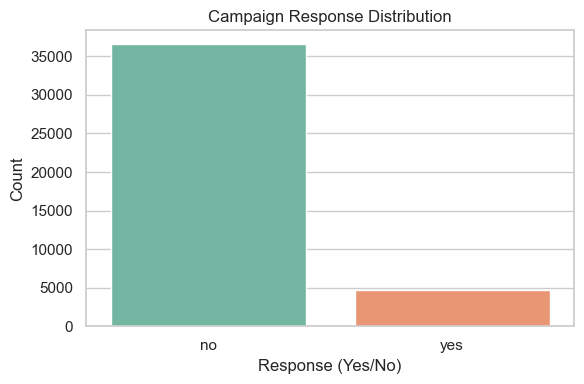

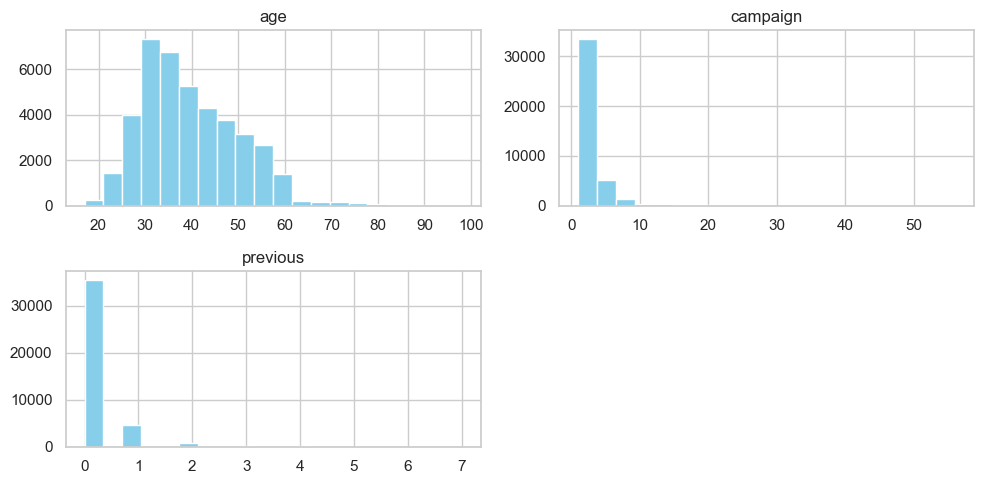

ValueError: could not convert string to float: 'housemaid'

In [13]:
# Step 7: Exploratory Data Analysis (EDA)
# -----------------------------

# 1. Distribution of target variable
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df, palette='Set2')
plt.title("Campaign Response Distribution")
plt.xlabel("Response (Yes/No)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Distribution of numeric features (age, campaign, previous)
df[['age', 'campaign', 'previous']].hist(bins=20, figsize=(10,5), color='skyblue')
plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 4. Response rate by job type
plt.figure(figsize=(12,5))
sns.countplot(x='job', hue='y', data=df, palette='Set1')
plt.title("Response by Job Type")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Response rate by age group
plt.figure(figsize=(6,4))
sns.countplot(x='age_group', hue='y', data=df, palette='Set3')
plt.title("Response by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



In [14]:
# Step 8: Save Cleaned Dataset
df.to_csv("bank_marketing_cleaned.csv", index=False)

In [15]:
# Step 9: Summary
print("Cleaned dataset ready for modeling.")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Cleaned dataset ready for modeling.
Shape: (41176, 25)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'response_binary', 'pdays_not_contacted', 'engagement_rate', 'age_group']
